# Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

# Import csv data

In [2]:
df = pd.read_csv('cwdata.csv')

# Display first 10 rows of data to ensure correctly imported

In [3]:
df.head(10)

,Income,Area,Employed,Home Owner,Make,Model,Gender,Age,Colour,Stolen
0,12500,Urban,NaN,N,Toyota,Auris,F,25,Yellow,N
1,76300,R,Y,Y,BMW,3 series,Male,25,Black,Yes
2,52340,Rural,N,Yes,Mercedes,C Class,F,25,Grey,1
3,150600,Rural,Y,Y,BMW,3 series,F,19,White,Y
4,50000,Rural,Yes,1,Volkswagon,Golf,Male,55,Black,Yes
5,15000,Rural,Y,Yes,Peugeot,107,F,54,Yellow,N
6,6550,U,Y,No,Toyota,Avensis,Male,42,Red,N
7,75430,R,Yes,1,BMW,3 series,F,32,Grey,Yes
8,54350,Rural,No,N,Mercedes,C Class,Female,65,Black,Y
9,42130,U,Y,Y,Ford,Kia,M,28,Red,No


# Check the size of the dataset

In [4]:
df.shape

(120, 10)

# Clean: Empty strings to NaN Values

In [5]:
df.replace(' ', np.nan, inplace=True)
df.replace('', np.nan, inplace=True)

# Clean: Income

## Check unique entries within INCOME
### to see what needs cleaning

In [6]:
sorted(df['Income'].unique())

[0,
 3560,
 5000,
 5450,
 5500,
 6550,
 8650,
 11250,
 12300,
 12340,
 12345,
 12500,
 15000,
 15230,
 21500,
 22450,
 26525,
 31240,
 32250,
 32450,
 34560,
 35200,
 35600,
 37250,
 37650,
 38000,
 38600,
 38900,
 39350,
 39600,
 39860,
 41230,
 42000,
 42130,
 42450,
 43000,
 43235,
 43250,
 43560,
 45000,
 45050,
 45500,
 46530,
 46540,
 46550,
 47650,
 47980,
 48459,
 50000,
 52000,
 52340,
 52350,
 53200,
 54000,
 54350,
 54560,
 55200,
 55230,
 55600,
 56870,
 63225,
 64230,
 65200,
 74500,
 75250,
 75300,
 75430,
 76300,
 76320,
 78450,
 82300,
 84500,
 86550,
 95500,
 150600,
 156000]

# Clean: Area

## Check unique entries within AREA
### to see what needs cleaning

In [7]:
df['Area'].unique()

array(['Urban', 'R', 'Rural', 'U ', 'U', 'u', 'r', 'Rurak'], dtype=object)

## Make all entries uppercase
### because there are lower and uppercase entries

In [8]:
df['Area'] = df['Area'].str.upper()
df['Area'].unique()

array(['URBAN', 'R', 'RURAL', 'U ', 'U', 'RURAK'], dtype=object)

## Replace the variations of urban with URBAN
### and the same for variations of RURAL
#### inplace = True edits the original dataframe rather than creating a new one

In [9]:
df['Area'].replace({'U ': 'URBAN', 'U': 'URBAN', 'R': 'RURAL', 'RURAK': 'RURAL'}, inplace=True)
df['Area'].unique()


array(['URBAN', 'RURAL'], dtype=object)

## Reload dataframe with cleaned column
### Deal with NaN values after complete dataframe clean to allow for more accurate linear interpolation

In [10]:
df.head(10)

,Income,Area,Employed,Home Owner,Make,Model,Gender,Age,Colour,Stolen
0,12500,URBAN,NaN,N,Toyota,Auris,F,25,Yellow,N
1,76300,RURAL,Y,Y,BMW,3 series,Male,25,Black,Yes
2,52340,RURAL,N,Yes,Mercedes,C Class,F,25,Grey,1
3,150600,RURAL,Y,Y,BMW,3 series,F,19,White,Y
4,50000,RURAL,Yes,1,Volkswagon,Golf,Male,55,Black,Yes
5,15000,RURAL,Y,Yes,Peugeot,107,F,54,Yellow,N
6,6550,URBAN,Y,No,Toyota,Avensis,Male,42,Red,N
7,75430,RURAL,Yes,1,BMW,3 series,F,32,Grey,Yes
8,54350,RURAL,No,N,Mercedes,C Class,Female,65,Black,Y
9,42130,URBAN,Y,Y,Ford,Kia,M,28,Red,No


# Clean: Employed

## Check unique entries within EMPLOYED
### to see what needs cleaning

In [11]:
df['Employed'].unique()

array([nan, 'Y', 'N', 'Yes', 'No', '1', '0', 'y'], dtype=object)

## Make all entries uppercase
### because there are lower and uppercase entries

In [12]:
df['Employed'] = df['Employed'].str.upper()
df['Employed'].unique()

array([nan, 'Y', 'N', 'YES', 'NO', '1', '0'], dtype=object)

## Convert variations of yes and no into binary values 1 or 0 respectively

In [13]:
df['Employed'].replace({'Y' : '1', 'YES' : '1', 'N' : '0', 'NO' : '0'}, inplace = True)
df['Employed'].unique()

array([nan, '1', '0'], dtype=object)

## Reload dataframe with cleaned column

In [14]:
df.head(10)

,Income,Area,Employed,Home Owner,Make,Model,Gender,Age,Colour,Stolen
0,12500,URBAN,NaN,N,Toyota,Auris,F,25,Yellow,N
1,76300,RURAL,1,Y,BMW,3 series,Male,25,Black,Yes
2,52340,RURAL,0,Yes,Mercedes,C Class,F,25,Grey,1
3,150600,RURAL,1,Y,BMW,3 series,F,19,White,Y
4,50000,RURAL,1,1,Volkswagon,Golf,Male,55,Black,Yes
5,15000,RURAL,1,Yes,Peugeot,107,F,54,Yellow,N
6,6550,URBAN,1,No,Toyota,Avensis,Male,42,Red,N
7,75430,RURAL,1,1,BMW,3 series,F,32,Grey,Yes
8,54350,RURAL,0,N,Mercedes,C Class,Female,65,Black,Y
9,42130,URBAN,1,Y,Ford,Kia,M,28,Red,No


# Clean: Home Owner

## Check unique entries within HOME OWNER
### to see what needs cleaning

In [15]:
df['Home Owner'].unique()

array(['N', 'Y', 'Yes', '1', 'No', 'n', 'y', nan], dtype=object)

## Make all entries uppercase
### because there are lower and uppercase entries

In [16]:
df['Home Owner'] = df['Home Owner'].str.upper()
df['Home Owner'].unique()

array(['N', 'Y', 'YES', '1', 'NO', nan], dtype=object)

## Convert variations of yes and no into binary values 1 or 0 respectively

In [17]:
df['Home Owner'].replace({'Y' : '1', 'YES' : '1', 'N' : '0', 'NO' : '0'}, inplace = True)
df['Home Owner'].unique()

array(['0', '1', nan], dtype=object)

## Reload dataframe with cleaned column

In [18]:
df.head(10)

,Income,Area,Employed,Home Owner,Make,Model,Gender,Age,Colour,Stolen
0,12500,URBAN,NaN,0,Toyota,Auris,F,25,Yellow,N
1,76300,RURAL,1,1,BMW,3 series,Male,25,Black,Yes
2,52340,RURAL,0,1,Mercedes,C Class,F,25,Grey,1
3,150600,RURAL,1,1,BMW,3 series,F,19,White,Y
4,50000,RURAL,1,1,Volkswagon,Golf,Male,55,Black,Yes
5,15000,RURAL,1,1,Peugeot,107,F,54,Yellow,N
6,6550,URBAN,1,0,Toyota,Avensis,Male,42,Red,N
7,75430,RURAL,1,1,BMW,3 series,F,32,Grey,Yes
8,54350,RURAL,0,0,Mercedes,C Class,Female,65,Black,Y
9,42130,URBAN,1,1,Ford,Kia,M,28,Red,No


# Clean: Make

## Check unique entries within Make
### to see what needs cleaning

In [19]:
df['Make'].unique()

array(['Toyota', 'BMW', 'Mercedes', 'Volkswagon', 'Peugeot', 'Ford',
       'Merecedes', 'Audi', 'Seat', 'Fiat', 'Citroen'], dtype=object)

## Make all entries uppercase

In [20]:
df['Make'] = df['Make'].str.upper()
df['Make'].unique()

array(['TOYOTA', 'BMW', 'MERCEDES', 'VOLKSWAGON', 'PEUGEOT', 'FORD',
       'MERECEDES', 'AUDI', 'SEAT', 'FIAT', 'CITROEN'], dtype=object)

## Fix double entries

In [21]:
df['Make'].replace({'MERECEDES' : 'MERCEDES'}, inplace = True)
df['Make'].unique()

array(['TOYOTA', 'BMW', 'MERCEDES', 'VOLKSWAGON', 'PEUGEOT', 'FORD',
       'AUDI', 'SEAT', 'FIAT', 'CITROEN'], dtype=object)

## Reload dataframe with cleaned column

In [22]:
df.head(10)

,Income,Area,Employed,Home Owner,Make,Model,Gender,Age,Colour,Stolen
0,12500,URBAN,NaN,0,TOYOTA,Auris,F,25,Yellow,N
1,76300,RURAL,1,1,BMW,3 series,Male,25,Black,Yes
2,52340,RURAL,0,1,MERCEDES,C Class,F,25,Grey,1
3,150600,RURAL,1,1,BMW,3 series,F,19,White,Y
4,50000,RURAL,1,1,VOLKSWAGON,Golf,Male,55,Black,Yes
5,15000,RURAL,1,1,PEUGEOT,107,F,54,Yellow,N
6,6550,URBAN,1,0,TOYOTA,Avensis,Male,42,Red,N
7,75430,RURAL,1,1,BMW,3 series,F,32,Grey,Yes
8,54350,RURAL,0,0,MERCEDES,C Class,Female,65,Black,Y
9,42130,URBAN,1,1,FORD,Kia,M,28,Red,No


# Clean: Model

## Check unique entries within MODEL
### to see what needs cleaning

In [23]:
df['Model'].unique()

array(['Auris', '3 series', 'C Class', 'Golf', '107', 'Avensis', 'Kia',
       '1 series', '3 Series', '207', 'Prius', 'Corolla', 'A  Class',
       'A4', 'X5', 'RS3', '2 Series', 'A3', 'Leon', 'Aygo', 'A1', 'Punto',
       'C1', 'A7', nan, 'Polo', '307'], dtype=object)

## This column contains both floats and strings
## Instead, treat all entries as strings and sort into alphabetical order

In [24]:
sorted(df['Model'].astype(str).unique())

['1 series',
 '107',
 '2 Series',
 '207',
 '3 Series',
 '3 series',
 '307',
 'A  Class',
 'A1',
 'A3',
 'A4',
 'A7',
 'Auris',
 'Avensis',
 'Aygo',
 'C Class',
 'C1',
 'Corolla',
 'Golf',
 'Kia',
 'Leon',
 'Polo',
 'Prius',
 'Punto',
 'RS3',
 'X5',
 'nan']

## Treat all as strings, and convert to uppercase to remove duplicate entries

In [25]:
(df['Model'].str.upper()).astype(str).unique()

array(['AURIS', '3 SERIES', 'C CLASS', 'GOLF', '107', 'AVENSIS', 'KIA',
       '1 SERIES', '207', 'PRIUS', 'COROLLA', 'A  CLASS', 'A4', 'X5',
       'RS3', '2 SERIES', 'A3', 'LEON', 'AYGO', 'A1', 'PUNTO', 'C1', 'A7',
       'nan', 'POLO', '307'], dtype=object)

## Update the table entries

In [26]:
df['Model'] = df['Model'].str.upper()

## Reload dataframe with cleaned column

In [27]:
df.head(10)

,Income,Area,Employed,Home Owner,Make,Model,Gender,Age,Colour,Stolen
0,12500,URBAN,NaN,0,TOYOTA,AURIS,F,25,Yellow,N
1,76300,RURAL,1,1,BMW,3 SERIES,Male,25,Black,Yes
2,52340,RURAL,0,1,MERCEDES,C CLASS,F,25,Grey,1
3,150600,RURAL,1,1,BMW,3 SERIES,F,19,White,Y
4,50000,RURAL,1,1,VOLKSWAGON,GOLF,Male,55,Black,Yes
5,15000,RURAL,1,1,PEUGEOT,107,F,54,Yellow,N
6,6550,URBAN,1,0,TOYOTA,AVENSIS,Male,42,Red,N
7,75430,RURAL,1,1,BMW,3 SERIES,F,32,Grey,Yes
8,54350,RURAL,0,0,MERCEDES,C CLASS,Female,65,Black,Y
9,42130,URBAN,1,1,FORD,KIA,M,28,Red,No


# Clean: Gender

## Check unique entries within Gender
### to see what needs cleaning

In [28]:
df['Gender'].unique()

array(['F', 'Male', 'Female', 'M', 'PNS'], dtype=object)

## Convert Female to 0, Male to 1 and PNS to 2

In [29]:
df['Gender'].replace({'Male' : '1', 'M' : '1', 'Female' : '0', 'F' : '0', 'PNS' : '2'}, inplace = True)
df['Gender'].unique()

array(['0', '1', '2'], dtype=object)

In [30]:
df.head(10)

,Income,Area,Employed,Home Owner,Make,Model,Gender,Age,Colour,Stolen
0,12500,URBAN,NaN,0,TOYOTA,AURIS,0,25,Yellow,N
1,76300,RURAL,1,1,BMW,3 SERIES,1,25,Black,Yes
2,52340,RURAL,0,1,MERCEDES,C CLASS,0,25,Grey,1
3,150600,RURAL,1,1,BMW,3 SERIES,0,19,White,Y
4,50000,RURAL,1,1,VOLKSWAGON,GOLF,1,55,Black,Yes
5,15000,RURAL,1,1,PEUGEOT,107,0,54,Yellow,N
6,6550,URBAN,1,0,TOYOTA,AVENSIS,1,42,Red,N
7,75430,RURAL,1,1,BMW,3 SERIES,0,32,Grey,Yes
8,54350,RURAL,0,0,MERCEDES,C CLASS,0,65,Black,Y
9,42130,URBAN,1,1,FORD,KIA,1,28,Red,No


# Clean: Age

## Check unique entries within Age
### to see what needs cleaning

In [31]:
(df['Age']).unique()

array(['25', '19', '55', '54', '42', '32', '65', '28', '29', '41', '34',
       '45', '23', '43', '33', '52', '26', '27', '21', '37', '53', '24',
       '36', '35', '18', '46', nan], dtype=object)

## Reload dataframe

In [32]:
df.head(10)

,Income,Area,Employed,Home Owner,Make,Model,Gender,Age,Colour,Stolen
0,12500,URBAN,NaN,0,TOYOTA,AURIS,0,25,Yellow,N
1,76300,RURAL,1,1,BMW,3 SERIES,1,25,Black,Yes
2,52340,RURAL,0,1,MERCEDES,C CLASS,0,25,Grey,1
3,150600,RURAL,1,1,BMW,3 SERIES,0,19,White,Y
4,50000,RURAL,1,1,VOLKSWAGON,GOLF,1,55,Black,Yes
5,15000,RURAL,1,1,PEUGEOT,107,0,54,Yellow,N
6,6550,URBAN,1,0,TOYOTA,AVENSIS,1,42,Red,N
7,75430,RURAL,1,1,BMW,3 SERIES,0,32,Grey,Yes
8,54350,RURAL,0,0,MERCEDES,C CLASS,0,65,Black,Y
9,42130,URBAN,1,1,FORD,KIA,1,28,Red,No


# Clean: Colour

## Check unique entries within COLOUR
### to see what needs cleaning

In [33]:
df['Colour'].unique()

array(['Yellow', 'Black', 'Grey', 'White', 'Red', 'Blue', 'White ',
       'Pink', 'Green', 'Purple'], dtype=object)

## Convert all strings to uppercase for visual clarity

In [34]:
df['Colour'] = df['Colour'].str.upper()
df['Colour'].unique()

array(['YELLOW', 'BLACK', 'GREY', 'WHITE', 'RED', 'BLUE', 'WHITE ',
       'PINK', 'GREEN', 'PURPLE'], dtype=object)

## Replace all instances of 'White ' with 'WHITE' to account for duplicate entries

In [35]:
df['Colour'] = df['Colour'].str.replace('WHITE ', 'WHITE')
df['Colour'].unique()

array(['YELLOW', 'BLACK', 'GREY', 'WHITE', 'RED', 'BLUE', 'PINK', 'GREEN',
       'PURPLE'], dtype=object)

## Reload dataframe with cleaned column

In [36]:
df.head(10)

,Income,Area,Employed,Home Owner,Make,Model,Gender,Age,Colour,Stolen
0,12500,URBAN,NaN,0,TOYOTA,AURIS,0,25,YELLOW,N
1,76300,RURAL,1,1,BMW,3 SERIES,1,25,BLACK,Yes
2,52340,RURAL,0,1,MERCEDES,C CLASS,0,25,GREY,1
3,150600,RURAL,1,1,BMW,3 SERIES,0,19,WHITE,Y
4,50000,RURAL,1,1,VOLKSWAGON,GOLF,1,55,BLACK,Yes
5,15000,RURAL,1,1,PEUGEOT,107,0,54,YELLOW,N
6,6550,URBAN,1,0,TOYOTA,AVENSIS,1,42,RED,N
7,75430,RURAL,1,1,BMW,3 SERIES,0,32,GREY,Yes
8,54350,RURAL,0,0,MERCEDES,C CLASS,0,65,BLACK,Y
9,42130,URBAN,1,1,FORD,KIA,1,28,RED,No


# Clean: Stolen

## Check unique entries within STOLEN
## to see what needs cleaning

In [37]:
df['Stolen'].unique()

array(['N', 'Yes', '1', 'Y', 'No', '0', 'n'], dtype=object)

## Convert all values to uppercase to account for duplicate entries

In [38]:
df['Stolen'] = df['Stolen'].str.upper()
df['Stolen'].unique()

array(['N', 'YES', '1', 'Y', 'NO', '0'], dtype=object)

## Replace variations of yes to 1 and no to 0

In [39]:
df['Stolen'].replace({'YES' : '1', 'Y' : '1', 'NO' : '0', 'N' : '0'}, inplace = True)
df['Stolen'].unique()

array(['0', '1'], dtype=object)

## Reload dataframe to ensure clean

In [40]:
df.head(10)

,Income,Area,Employed,Home Owner,Make,Model,Gender,Age,Colour,Stolen
0,12500,URBAN,NaN,0,TOYOTA,AURIS,0,25,YELLOW,0
1,76300,RURAL,1,1,BMW,3 SERIES,1,25,BLACK,1
2,52340,RURAL,0,1,MERCEDES,C CLASS,0,25,GREY,1
3,150600,RURAL,1,1,BMW,3 SERIES,0,19,WHITE,1
4,50000,RURAL,1,1,VOLKSWAGON,GOLF,1,55,BLACK,1
5,15000,RURAL,1,1,PEUGEOT,107,0,54,YELLOW,0
6,6550,URBAN,1,0,TOYOTA,AVENSIS,1,42,RED,0
7,75430,RURAL,1,1,BMW,3 SERIES,0,32,GREY,1
8,54350,RURAL,0,0,MERCEDES,C CLASS,0,65,BLACK,1
9,42130,URBAN,1,1,FORD,KIA,1,28,RED,0


# Deal with NaN values

## Check remaining NaN values

In [41]:
df_null = df.isnull()
df_null.sum()

Income        0
Area          0
Employed      2
Home Owner    1
Make          0
Model         1
Gender        0
Age           1
Colour        0
Stolen        0
dtype: int64

In [42]:
# Drop rows with NaN values and create a copy
df_cleaned = df.dropna().copy() ##CREATED COPY BECAUSE PANDAS KEPT SHOUTING WARNINGS AT ME FOR NOT COPYING

In [43]:
df.to_csv('cwdata_na.csv', index=False)

# Label encode all values in the cleaned df copy so we can use the integer ID's 


In [44]:
# Label encoding for categorical variables
label_encoder = LabelEncoder()
df_cleaned['Area'] = label_encoder.fit_transform(df_cleaned['Area'])
df_cleaned['Make'] = label_encoder.fit_transform(df_cleaned['Make'])
df_cleaned['Model'] = label_encoder.fit_transform(df_cleaned['Model'])
df_cleaned['Colour'] = label_encoder.fit_transform(df_cleaned['Colour'])




# Feature Analysis

## The copy dataframe now contains only numerical values so we can use the data for modelling and graphing now

In [45]:
# Calculate correlation matrix
corr = df_cleaned.corr()

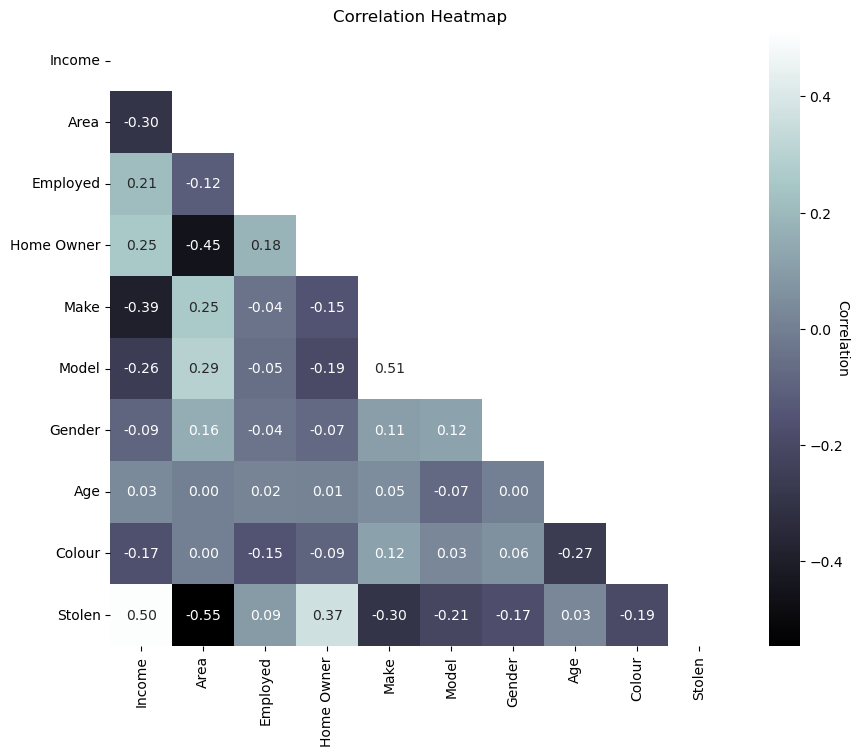

In [46]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr, annot=True, cmap='bone', mask=mask, fmt=".2f", cbar=True)

# Set title
plt.title('Correlation Heatmap')

# Retrieve the color bar object from the axes and set its label
cbar = heatmap.collections[0].colorbar
cbar.set_label('Correlation', rotation=270)

# Show plot
plt.show()


## Lets recall which 'Employed' data we need to estimate

In [47]:
# Filter rows with NA values
rows_with_na = df[df.isna().any(axis=1)]

# Display rows with NA values
print(rows_with_na)

    Income   Area Employed Home Owner     Make     Model Gender  Age  Colour  \
0    12500  URBAN      NaN          0   TOYOTA     AURIS      0   25  YELLOW   
77   56870  RURAL        0          1      BMW  3 SERIES      1  NaN   BLACK   
89   12500  URBAN      NaN          0   TOYOTA     AURIS      0   25  YELLOW   
92  150600  RURAL        1          1      BMW       NaN      0   19   WHITE   
93   43000  RURAL        1        NaN  PEUGEOT       107      1   55   BLACK   

   Stolen  
0       0  
77      1  
89      0  
92      0  
93      0  


## As shown above, the two NA values in Employed are duplicate entries so we can drop one and predict the other

In [48]:
specific_rows = df.loc[[0, 89]]
print(specific_rows)


    Income   Area Employed Home Owner    Make  Model Gender Age  Colour Stolen
0    12500  URBAN      NaN          0  TOYOTA  AURIS      0  25  YELLOW      0
89   12500  URBAN      NaN          0  TOYOTA  AURIS      0  25  YELLOW      0


In [49]:
# drop index 0
df = df.drop(0)

# Check for rows with NaN values in the "Employed" column
na_employed_rows = df[df['Employed'].isna()]

# Display rows with NaN values in the "Employed" column
print(na_employed_rows)

    Income   Area Employed Home Owner    Make  Model Gender Age  Colour Stolen
89   12500  URBAN      NaN          0  TOYOTA  AURIS      0  25  YELLOW      0


## The highest Employed correlation is against Income


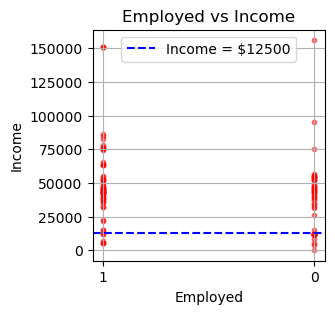

In [50]:
# Filter out rows with non-null values in both "Employed" and "Income" columns
df_employed_income = df.dropna(subset=['Employed', 'Income'])

# Plot the scatter plot with red points
plt.figure(figsize=(3, 3))
plt.scatter(df_employed_income['Employed'], df_employed_income['Income'], alpha=0.5, s=10, color='red')

# Draw a horizontal line at income value of 12500
plt.axhline(y=12500, color='blue', linestyle='--', label='Income = $12500')

plt.title('Employed vs Income')
plt.xlabel('Employed')
plt.ylabel('Income')
plt.grid(True)
plt.legend()
plt.show()


## Most of the surrounding points on the graph along the $12500 line are unemployed
### so we can assume they are unemployed

In [51]:
#fill na value with 0 and check the row
df['Employed'].fillna(0, inplace=True)
na_employment_row = df.loc[89]
print(na_employment_row)

Income         12500
Area           URBAN
Employed           0
Home Owner         0
Make          TOYOTA
Model          AURIS
Gender             0
Age               25
Colour        YELLOW
Stolen             0
Name: 89, dtype: object


In [52]:
df_null = df.isnull()
df_null.sum()

Income        0
Area          0
Employed      0
Home Owner    1
Make          0
Model         1
Gender        0
Age           1
Colour        0
Stolen        0
dtype: int64

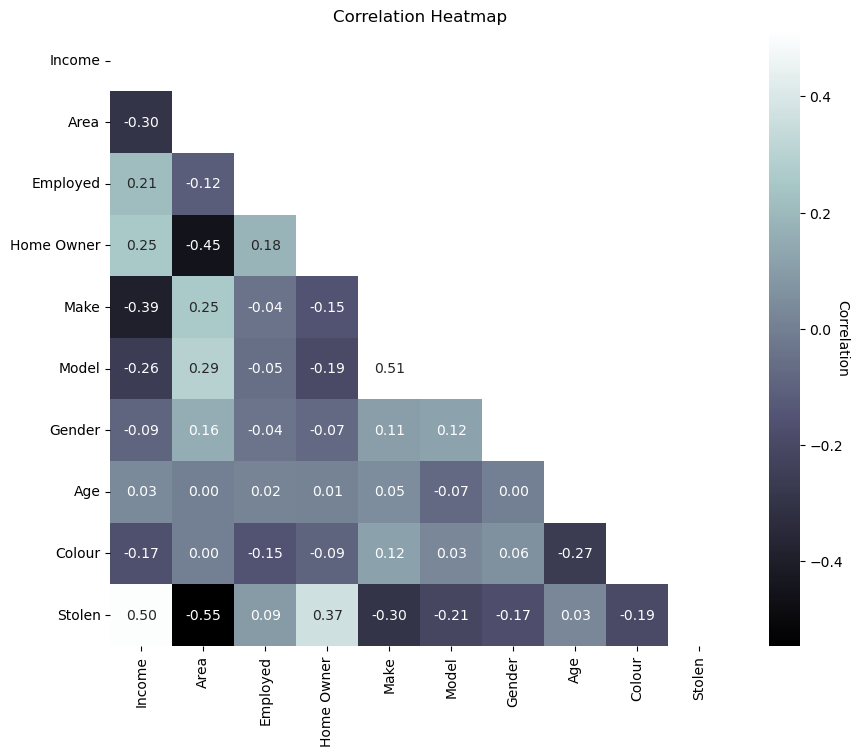

In [53]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr, annot=True, cmap='bone', mask=mask, fmt=".2f", cbar=True)

# Set title
plt.title('Correlation Heatmap')

# Retrieve the color bar object from the axes and set its label
cbar = heatmap.collections[0].colorbar
cbar.set_label('Correlation', rotation=270)

# Show plot
plt.show()


In [54]:
# Check for rows with NaN values in the "Employed" column
na_home_owner_rows = df[df['Home Owner'].isna()]

# Display rows with NaN values in the "Employed" column
print(na_home_owner_rows)

    Income   Area Employed Home Owner     Make Model Gender Age Colour Stolen
93   43000  RURAL        1        NaN  PEUGEOT   107      1  55  BLACK      0


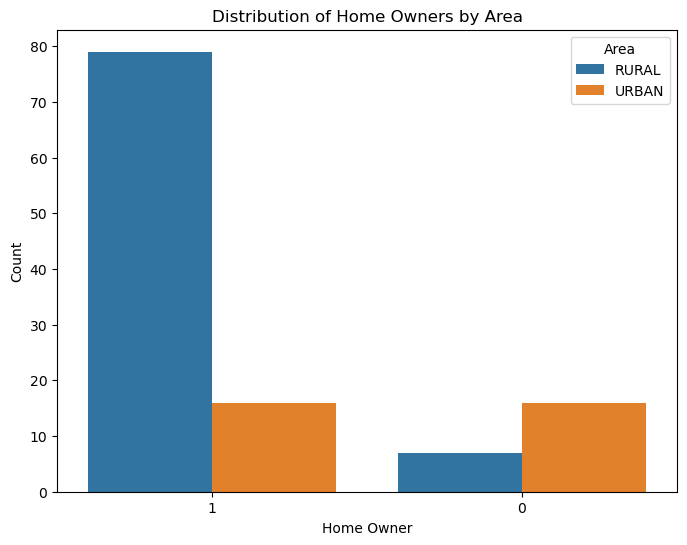

In [55]:
# Plot a clustered bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='Home Owner', hue='Area', data=df)
plt.title('Distribution of Home Owners by Area')
plt.xlabel('Home Owner')
plt.ylabel('Count')
plt.legend(title='Area')
plt.show()



## The user lives in a rural area and the majority of rural people are homeowners so its safe to assume he is a homeowner

In [56]:
# Replace NA values in the "Home Owner" column with 1 (homeowner)
df['Home Owner'].fillna(1, inplace=True)
na_home_owner_row = df.loc[93]
print(na_home_owner_row)

Income          43000
Area            RURAL
Employed            1
Home Owner          1
Make          PEUGEOT
Model             107
Gender              1
Age                55
Colour          BLACK
Stolen              0
Name: 93, dtype: object


In [57]:
df_null = df.isnull()
df_null.sum()

Income        0
Area          0
Employed      0
Home Owner    0
Make          0
Model         1
Gender        0
Age           1
Colour        0
Stolen        0
dtype: int64

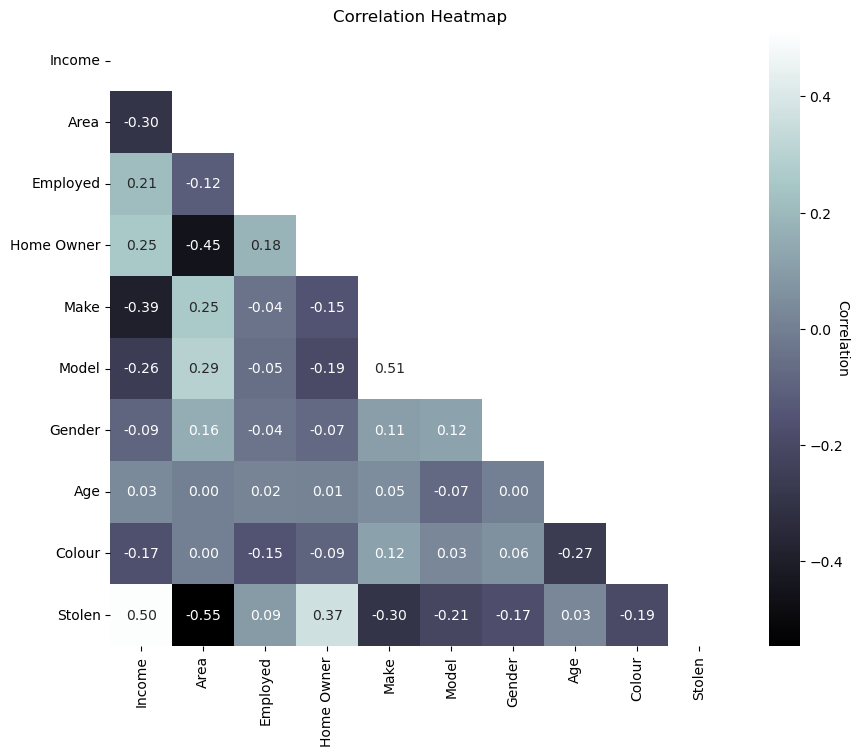

In [58]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr, annot=True, cmap='bone', mask=mask, fmt=".2f", cbar=True)

# Set title
plt.title('Correlation Heatmap')

# Retrieve the color bar object from the axes and set its label
cbar = heatmap.collections[0].colorbar
cbar.set_label('Correlation', rotation=270)

# Show plot
plt.show()


In [59]:
# Check for rows with NaN values in the "Employed" column
na_model_rows = df[df['Model'].isna()]

# Display rows with NaN values in the "Employed" column
print(na_model_rows)

    Income   Area Employed Home Owner Make Model Gender Age Colour Stolen
92  150600  RURAL        1          1  BMW   NaN      0  19  WHITE      0


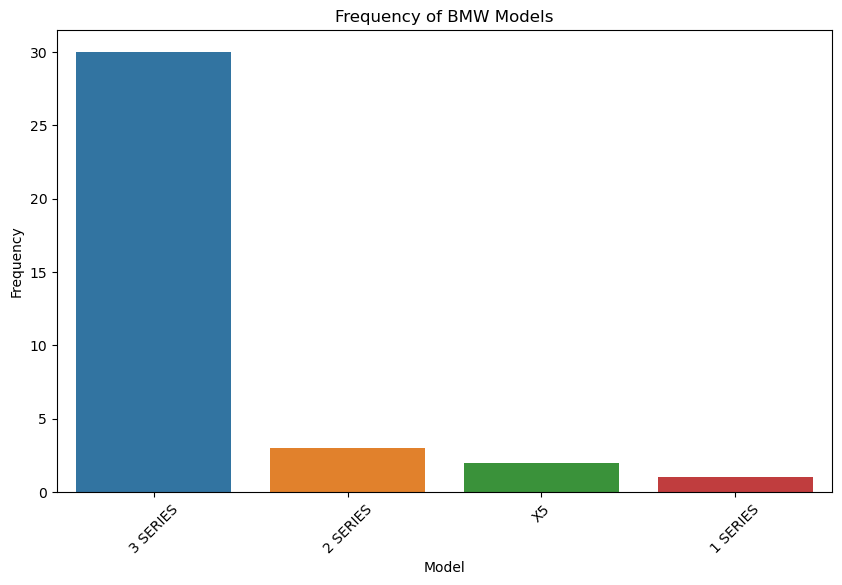

In [60]:
# Filter the DataFrame to include only rows where Make is 'BMW'
df_bmw = df[df['Make'] == 'BMW']

# Count the frequency of each BMW model
model_counts = df_bmw['Model'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=model_counts.index, y=model_counts.values)
plt.title('Frequency of BMW Models')
plt.xlabel('Model')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## The majority of the BMW models are 3 Series so its safe to assume he drives a 3 Series

In [61]:
# Replace NA values in the "Model" column with 3 Series (homeowner)
df['Model'].fillna('3 SERIES', inplace=True)
na_model_row = df.loc[92]
print(na_model_row)

Income          150600
Area             RURAL
Employed             1
Home Owner           1
Make               BMW
Model         3 SERIES
Gender               0
Age                 19
Colour           WHITE
Stolen               0
Name: 92, dtype: object


In [62]:
df_null = df.isnull()
df_null.sum()

Income        0
Area          0
Employed      0
Home Owner    0
Make          0
Model         0
Gender        0
Age           1
Colour        0
Stolen        0
dtype: int64

In [63]:
# Check for rows with NaN values in the "Employed" column
na_age_rows = df[df['Age'].isna()]

# Display rows with NaN values in the "Employed" column
print(na_age_rows)

    Income   Area Employed Home Owner Make     Model Gender  Age Colour Stolen
77   56870  RURAL        0          1  BMW  3 SERIES      1  NaN  BLACK      1


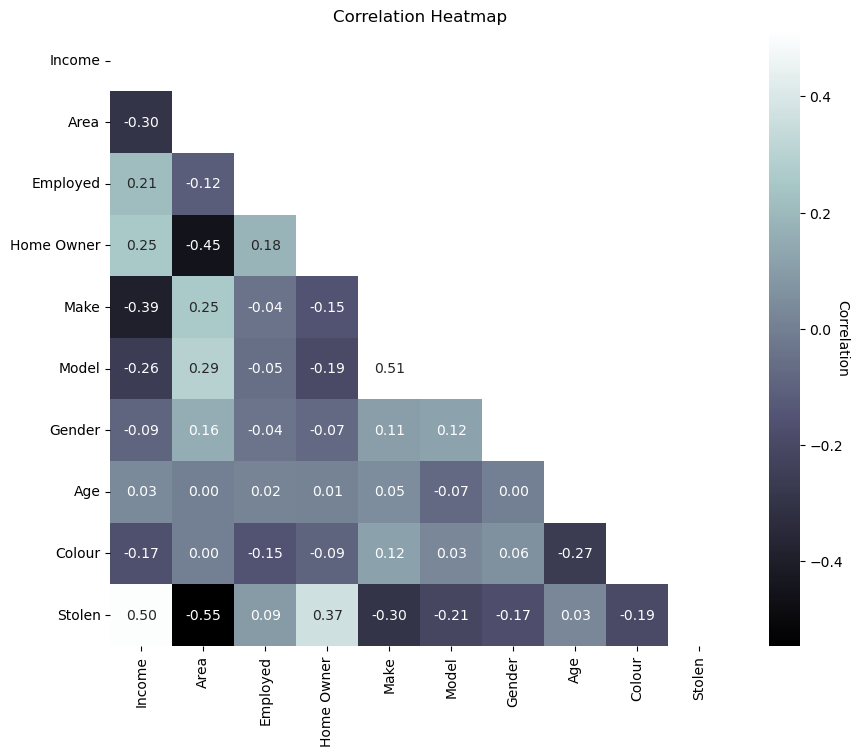

In [64]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr, annot=True, cmap='bone', mask=mask, fmt=".2f", cbar=True)

# Set title
plt.title('Correlation Heatmap')

# Retrieve the color bar object from the axes and set its label
cbar = heatmap.collections[0].colorbar
cbar.set_label('Correlation', rotation=270)

# Show plot
plt.show()


C:\Users\ellio\AppData\Local\Temp\ipykernel_7280\2346014650.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_colour['Age'] = df_age_colour['Age'].astype(int)


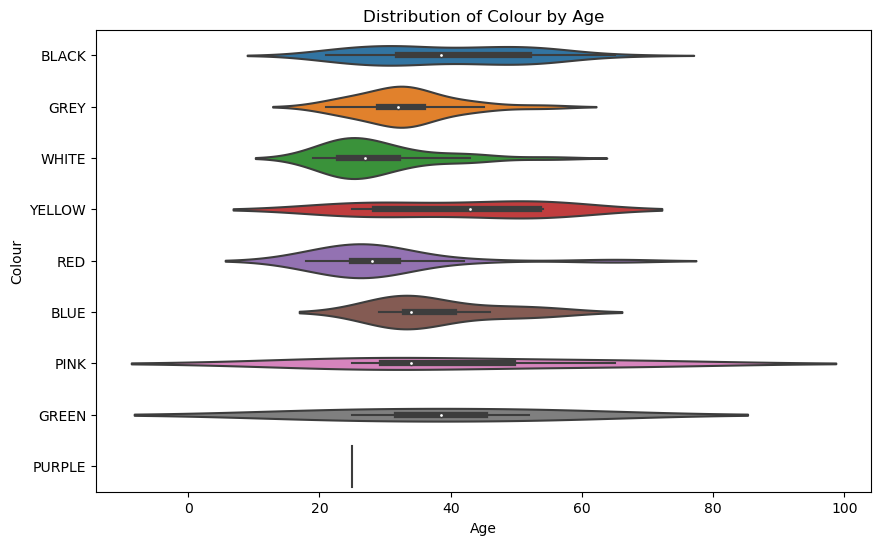

In [65]:
# Drop rows with NaN values in 'Age' or 'Colour' columns
df_age_colour = df.dropna(subset=['Age', 'Colour'])

# Convert 'Age' column to numerical data type
df_age_colour['Age'] = df_age_colour['Age'].astype(int)

# Plot a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Age', y='Colour', data=df_age_colour)
plt.title('Distribution of Colour by Age')
plt.xlabel('Age')
plt.ylabel('Colour')
plt.show()

## Not really any useful correlation so just drop it

In [66]:
df = df.dropna(subset=['Age'])
df.isna().any()

Income        False
Area          False
Employed      False
Home Owner    False
Make          False
Model         False
Gender        False
Age           False
Colour        False
Stolen        False
dtype: bool

In [69]:
#df.to_csv('cwdata_cleaned.csv', index=False)